# Modeling and Simulations Project 1

Studio 1

Jinfay Yuan & Jack Mao

In [660]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

In [661]:
tables = read_html('https://en.wikipedia.org/wiki/United_States_immigration_statistics',
header=0,
decimal = '.',
index_col=0)
table2 = tables[1]
table2.index.get_loc('China')


56

In [662]:
China = table2.loc['China']
China = China.reindex(index=China.index[::-1]) #Reorganizes the index of values (reverses it)

index = China.index.astype(float) #Sets the data type as a float
values = China.values.astype(float)

china = TimeSeries(data = values, index = index) #Creates a time series called China

,values
1850.0,758.0
1860.0,35565.0
1870.0,63042.0
1880.0,104468.0
1890.0,106688.0
1900.0,81534.0
1910.0,56756.0
1920.0,43560.0
1950.0,46129.0
1960.0,99735.0


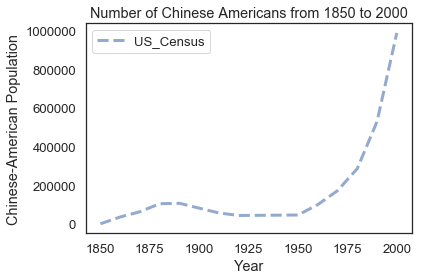

In [663]:
plot(china, '--',label='US_Census')
decorate(xlabel='Year', 
            ylabel='Chinese-American Population',
            title="Number of Chinese Americans from 1850 to 2000")

## What would the Chinese-American population look like today if the Chinese Exclusion Act of 1882 and the Geary Act had not existed?
As the previous figure shows, the Chinese-American population decreased during 1880-1920. This phenomenon is the effect of the Chinese Exclusion Act of 1882 and the Geary Act, which banned the immigration of Chinese laborers into the United States. With no influx of immigrants, the population of Chinese-Americans began to fade with time.

If these policies were never approved, what would the Chinese-American population look like today?

To dive deeper into this question, we will consider three variables: the birth rate, death rate, and immigration rate. Because the effects of the Chinese Exclusion Act and the Geary Act is the sole focus of this project,the birth/death rate will simply be held at constants and the immigration rate will be more closely examined. In order to do so, the immigration rate is modeled based on the change in population prior to the passing of the two policies. Using this model, we can then extrapolate immigration rates for the years in which the policies were passed and create a population model that explores an answer to our question.


[1850. 1860. 1870. 1880. 1890. 1900. 1910. 1920. 1930. 1940. 1950. 1960.
 1970. 1980. 1990. 2000.]


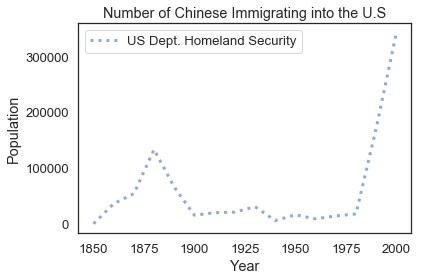

In [664]:
Year = linrange(1850, 2000, 10,endpoint=True)
print(Year)
pop = [32, 35933,54028, 133139, 65797, 15268, 19884, 20916, 30648, 5874, 16072, 8836, 14060, 17627, 170897,342058] 
immigrant_influx = TimeSeries(pop, Year)

plot(immigrant_influx, ':', label='US Dept. Homeland Security')
decorate(xlabel='Year', 
            ylabel='Population',
            title="Number of Chinese Immigrating into the U.S")


In [665]:
def plot_results(immigrant_influx,timeseries,title):
    """Plot the estimates and the model.
    
    immigrant_influx = actual data of how many chinese-americans immigrated
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(immigrant_influx, ':', label='US Dept of Homeland Security')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Population',
             title=title)

In [666]:
t_0 = Year[0]
t_1880 = Year[3]
elasped_time = t_end - t_0
p_0 = pop[0]
p_end = pop[3]
total_growth = p_end - p_0

decadal_growth = total_growth/(elasped_time/10)

44369.0

In [667]:
results = TimeSeries()
results[t_0] = p_0
for t in linrange(t_0,t_end,10):
    results[t+10] = results[t] + decadal_growth


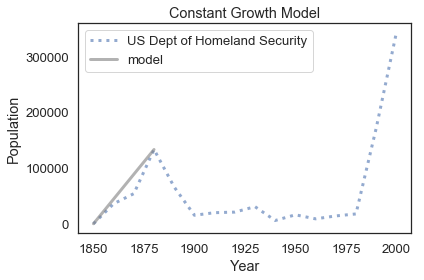

In [668]:
plot_results(immigrant_influx,results,'Constant Growth Model')

In [669]:
def run_simulation(system, update_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(t_0, t_1880, 10):
        results[t+10] = update_func(results[t], t, system)
        
    return results

In [670]:
system = System(t_0=Year[0], 
                t_1880=Year[2],
                p_0=pop[0],
                alpha=1.5)



def update_func_prop(pop, t, system):
    """Compute the population next year with a quadratic model.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year"""
    net_growth = system.alpha * pop
  
    return pop + net_growth

1850        32.0
1860     44401.0
1870     88770.0
1880    133139.0
dtype: float64


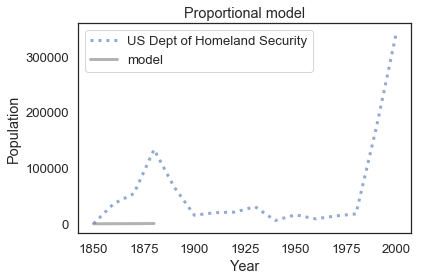

In [671]:
prop_results = run_simulation(system, update_func_prop)
plot_results(immigrant_influx,prop_results,'Proportional model')
print(results)

In [672]:
system_quad = System(t_0=Year[0], 
                t_end=Year[3],
                p_0=pop[0],
                alpha=15,
                beta=-.0000575)

def update_func_quad(pop, t, system):
    net_growth = system_quad.alpha * pop + system_quad.beta * pop**2
    return pop + net_growth

1850        32.000000
1860       511.941120
1870      8175.988107
1880    126972.119769
dtype: float64


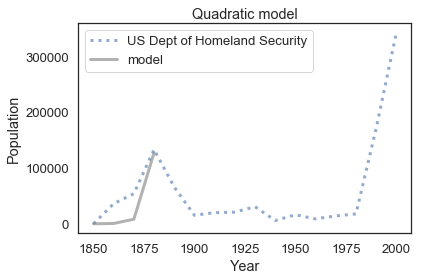

In [673]:
quad_results = run_simulation(system_quad,update_func_quad)
plot_results(immigrant_influx,quad_results,'Quadratic model')
print(quad_results)

In [715]:
system_extrap = System(t_1880=Year[3],
                      t_1920=Year[7],
                      t_1950=Year[11],
                      p_1880=pop[3],
                      alpha=1.55,
                      beta=-.00000775)




,values
t_1880,1880.000000
t_1920,1920.000000
t_1950,1960.000000
p_1880,133139.000000
alpha,1.550000
beta,-0.000008


In [716]:
def run_extrapolation(system, update_func):
    results = TimeSeries()
    results[system.t_1880] = system.p_1880
    
    for t in linrange(system.t_1880,system.t_1950,10):
        results[t+10] = update_func(results[t], t, system)
        
    return results


In [726]:
def update_func_extrap(pop, t, system):
    if t == 1910 or t == 1940: 
        net_growth = -.90 * pop
    elif t == 1930:
        net_growth = -.60 * pop
    elif t == 1950:
        net_growth = 50 * pop
    else:
        net_growth = system.alpha * pop + system.beta * pop**2
        
    return pop + net_growth

1880    133139.000000
1890    202128.001762
1900    198794.503997
1910    200651.760342
1920     20065.176034
1930     48045.961395
1940     19218.384558
1950      1921.838456
1960     98013.761246
dtype: float64
1870.0


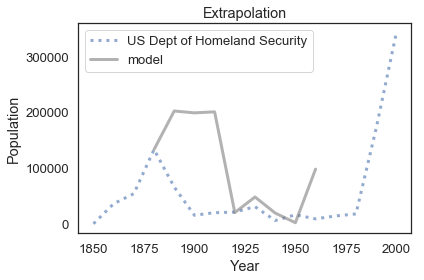

In [728]:
extrap_results = run_extrapolation(system_extrap,update_func_extrap)
plot_results(immigrant_influx,extrap_results,'Extrapolation')
print(extrap_results)
print(t)